In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv('kidney_disease.csv') 
data['Chronic Kidney Disease: yes'].value_counts()

Chronic Kidney Disease: yes
1.0    250
0.0    150
Name: count, dtype: int64

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age (yrs)                       400 non-null    float64
 1   Blood Pressure (mm/Hg)          400 non-null    float64
 2   Specific Gravity                400 non-null    float64
 3   Albumin                         400 non-null    float64
 4   Sugar                           400 non-null    float64
 5   Blood Glucose Random (mgs/dL)   400 non-null    float64
 6   Blood Urea (mgs/dL)             400 non-null    float64
 7   Serum Creatinine (mgs/dL)       400 non-null    float64
 8   Sodium (mEq/L)                  400 non-null    float64
 9   Potassium (mEq/L)               400 non-null    float64
 10  Hemoglobin (gms)                400 non-null    float64
 11  Packed Cell Volume              400 non-null    float64
 12  White Blood Cells (cells/cmm)   400 

In [4]:
data = data[data['Blood Urea (mgs/dL)']<300]
data = data[data['Serum Creatinine (mgs/dL)']<40]
data = data[data['Sodium (mEq/L)']>80]
data = data[data['Potassium (mEq/L)']<30]
data = data[data['White Blood Cells (cells/cmm)']<20000]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age (yrs)                       392 non-null    float64
 1   Blood Pressure (mm/Hg)          392 non-null    float64
 2   Specific Gravity                392 non-null    float64
 3   Albumin                         392 non-null    float64
 4   Sugar                           392 non-null    float64
 5   Blood Glucose Random (mgs/dL)   392 non-null    float64
 6   Blood Urea (mgs/dL)             392 non-null    float64
 7   Serum Creatinine (mgs/dL)       392 non-null    float64
 8   Sodium (mEq/L)                  392 non-null    float64
 9   Potassium (mEq/L)               392 non-null    float64
 10  Hemoglobin (gms)                392 non-null    float64
 11  Packed Cell Volume              392 non-null    float64
 12  White Blood Cells (cells/cmm)   392 non-n

In [5]:
#應變數轉為label
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

data['ckd_encode'] = labelencoder.fit_transform(data['Chronic Kidney Disease: yes'])
data

,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Blood Glucose Random (mgs/dL),Blood Urea (mgs/dL),Serum Creatinine (mgs/dL),Sodium (mEq/L),Potassium (mEq/L),...,Pus Cell Clumps: present,Bacteria: present,Hypertension: yes,Diabetes Mellitus: yes,Coronary Artery Disease: yes,Appetite: poor,Pedal Edema: yes,Anemia: yes,Chronic Kidney Disease: yes,ckd_encode
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,136.0,4.7,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1
1,7.0,50.0,1.020,4.0,0.0,90.316581,18.0,0.8,140.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,135.0,4.8,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.0,2.5,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,140.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.000000,49.0,0.5,150.0,4.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
396,42.0,70.0,1.025,0.0,0.0,75.000000,31.0,1.2,141.0,3.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
397,12.0,80.0,1.020,0.0,0.0,100.000000,26.0,0.6,137.0,4.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
398,17.0,60.0,1.025,0.0,0.0,114.000000,50.0,1.0,135.0,4.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [6]:
##取得應變數資料 (因為 Scikit-learn 不支援類別型變數，所以需要encoding變數)
y=data['ckd_encode']

In [7]:
#取得自變數資料
X=data.iloc[:,0:24]
X

,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Blood Glucose Random (mgs/dL),Blood Urea (mgs/dL),Serum Creatinine (mgs/dL),Sodium (mEq/L),Potassium (mEq/L),...,Red Blood Cells: normal,Pus Cells: normal,Pus Cell Clumps: present,Bacteria: present,Hypertension: yes,Diabetes Mellitus: yes,Coronary Artery Disease: yes,Appetite: poor,Pedal Edema: yes,Anemia: yes
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,136.0,4.7,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,7.0,50.0,1.020,4.0,0.0,90.316581,18.0,0.8,140.0,4.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,135.0,4.8,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.0,2.5,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,140.0,4.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.000000,49.0,0.5,150.0,4.9,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,42.0,70.0,1.025,0.0,0.0,75.000000,31.0,1.2,141.0,3.5,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,12.0,80.0,1.020,0.0,0.0,100.000000,26.0,0.6,137.0,4.4,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,17.0,60.0,1.025,0.0,0.0,114.000000,50.0,1.0,135.0,4.9,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#檢查資料大小
X.shape

(392, 24)

test_size: 0.01
Train data accuracy: 1.0
Test data accuracy: 1.0
-----------------------
test_size: 0.02
Train data accuracy: 1.0
Test data accuracy: 1.0
-----------------------
test_size: 0.03
Train data accuracy: 1.0
Test data accuracy: 1.0
-----------------------
test_size: 0.04
Train data accuracy: 1.0
Test data accuracy: 1.0
-----------------------
test_size: 0.05
Train data accuracy: 1.0
Test data accuracy: 1.0
-----------------------
test_size: 0.06
Train data accuracy: 1.0
Test data accuracy: 1.0
-----------------------
test_size: 0.07
Train data accuracy: 1.0
Test data accuracy: 1.0
-----------------------
test_size: 0.08
Train data accuracy: 1.0
Test data accuracy: 1.0
-----------------------
test_size: 0.09
Train data accuracy: 1.0
Test data accuracy: 1.0
-----------------------
test_size: 0.1
Train data accuracy: 1.0
Test data accuracy: 1.0
-----------------------
test_size: 0.11
Train data accuracy: 1.0
Test data accuracy: 1.0
-----------------------
test_size: 0.12
Train 

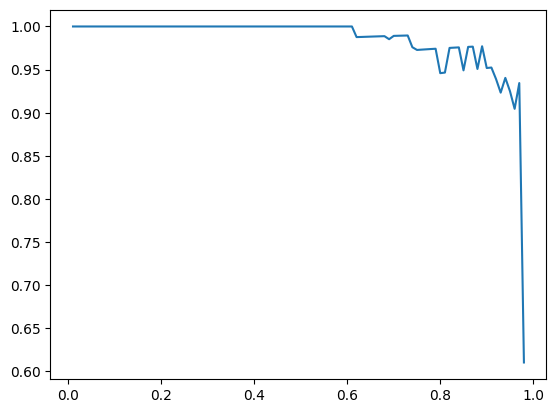

In [18]:
#分割資料集
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier(criterion='entropy')
test_acc_list = []

for i in range(1,99):
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0, test_size = i/100)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("test_size:", i/100)
    print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=model.predict(X_train)))
    test_acc = accuracy_score(y_true = y_test, y_pred=y_pred)
    test_acc_list.append(test_acc)
    print("Test data accuracy:",test_acc)
    print("-----------------------")

import matplotlib.pyplot as plt
plt.plot(np.arange(0.01,0.99,0.01),test_acc_list)
plt.show()

In [10]:
#分割資料集
from sklearn.model_selection import train_test_split

#可自行調整test_size值
# X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0, test_size = 0.5)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0, test_size = 0.6)

In [11]:
#建立決策樹模型
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier(criterion='entropy')
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [12]:
#模型準確度
y_pred = model.predict(X_test)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=model.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=y_pred))

Train data accuracy: 1.0
Test data accuracy: 1.0


In [13]:
# 取得資料表欄位 並移除label欄位
data_col=data.columns.tolist()
data_col.remove('Chronic Kidney Disease: yes')
data_col.remove('ckd_encode')

In [14]:
#輸出成dot檔案格式
from sklearn import tree
tree.export_graphviz(model,out_file='tree_rule_ckd.dot', 
                     feature_names=data_col,
                     class_names=['0','1'],
                     filled=True,
                     node_ids=True,
                     rounded=True,
                     special_characters=True)

In [15]:
#將dot檔案貼上dot視覺化網站
https://dreampuf.github.io/GraphvizOnline/#digraph%20G%20%7B%0A%0A%20%20subgraph%20cluster_0%20%7B%0A%20%20%20%20style%3Dfilled%3B%0A%20%20%20%20color%3Dlightgrey%3B%0A%20%20%20%20node%20%5Bstyle%3Dfilled%2Ccolor%3Dwhite%5D%3B%0A%20%20%20%20a0%20-%3E%20a1%20-%3E%20a2%20-%3E%20a3%3B%0A%20%20%20%20label%20%3D%20%22process%20%231%22%3B%0A%20%20%7D%0A%0A%20%20subgraph%20cluster_1%20%7B%0A%20%20%20%20node%20%5Bstyle%3Dfilled%5D%3B%0A%20%20%20%20b0%20-%3E%20b1%20-%3E%20b2%20-%3E%20b3%3B%0A%20%20%20%20label%20%3D%20%22process%20%232%22%3B%0A%20%20%20%20color%3Dblue%0A%20%20%7D%0A%20%20start%20-%3E%20a0%3B%0A%20%20start%20-%3E%20b0%3B%0A%20%20a1%20-%3E%20b3%3B%0A%20%20b2%20-%3E%20a3%3B%0A%20%20a3%20-%3E%20a0%3B%0A%20%20a3%20-%3E%20end%3B%0A%20%20b3%20-%3E%20end%3B%0A%0A%20%20start%20%5Bshape%3DMdiamond%5D%3B%0A%20%20end%20%5Bshape%3DMsquare%5D%3B%0A%7D


SyntaxError: invalid syntax (1507109718.py, line 2)